# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images.

*Note: All images come from the [AMOS dataset](https://mvrl.cse.wustl.edu/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [34]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 27.41 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [35]:
import cv2
import os, glob

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets.

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

- image_dir_training: the directory where our training image data is stored
- image_dir_test: the directory where our test image data is stored

In [36]:
# Image data directories
image_dir_training = "DL_Data_sets/images/day_night_images/training/"
image_dir_test = "DL_Data_sets/images/day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night").

This function loads in images and their labels and places them in a list. The list contains all images and their associated labels. For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list

In [37]:
def load_dataset(image_dir):
    print(os.getcwd())


    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]

    # Iterate through each color folder
    for im_type in image_types:

        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):

            # Read in the image
            im = cv2.imread(file)
            # Change color to RGB (from BGR)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))

    return im_list

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index:
``` IMAGE_LIST[0][:]```.

In [38]:
# Load training data
IMAGE_LIST = load_dataset(image_dir_training)
IMAGE_LIST[120][:]

/content


(array([[[22, 24, 23],
         [21, 23, 22],
         [20, 22, 21],
         ...,
         [25, 26, 20],
         [24, 25, 19],
         [24, 25, 19]],
 
        [[22, 24, 23],
         [21, 23, 22],
         [20, 22, 21],
         ...,
         [24, 25, 19],
         [23, 24, 18],
         [23, 24, 18]],
 
        [[22, 24, 23],
         [21, 23, 22],
         [20, 22, 21],
         ...,
         [23, 24, 18],
         [22, 23, 17],
         [22, 23, 17]],
 
        ...,
 
        [[11, 13, 12],
         [ 9, 11, 10],
         [ 7,  9,  8],
         ...,
         [ 8, 11,  4],
         [ 8, 11,  4],
         [ 7, 10,  3]],
 
        [[11, 13, 12],
         [ 9, 11, 10],
         [ 7,  9,  8],
         ...,
         [ 8, 11,  4],
         [ 8, 11,  4],
         [ 7, 10,  3]],
 
        [[11, 13, 12],
         [ 9, 11, 10],
         [ 7,  9,  8],
         ...,
         [ 8, 11,  4],
         [ 8, 11,  4],
         [ 7, 10,  3]]], dtype=uint8),
 'night')

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualize sample day and night images

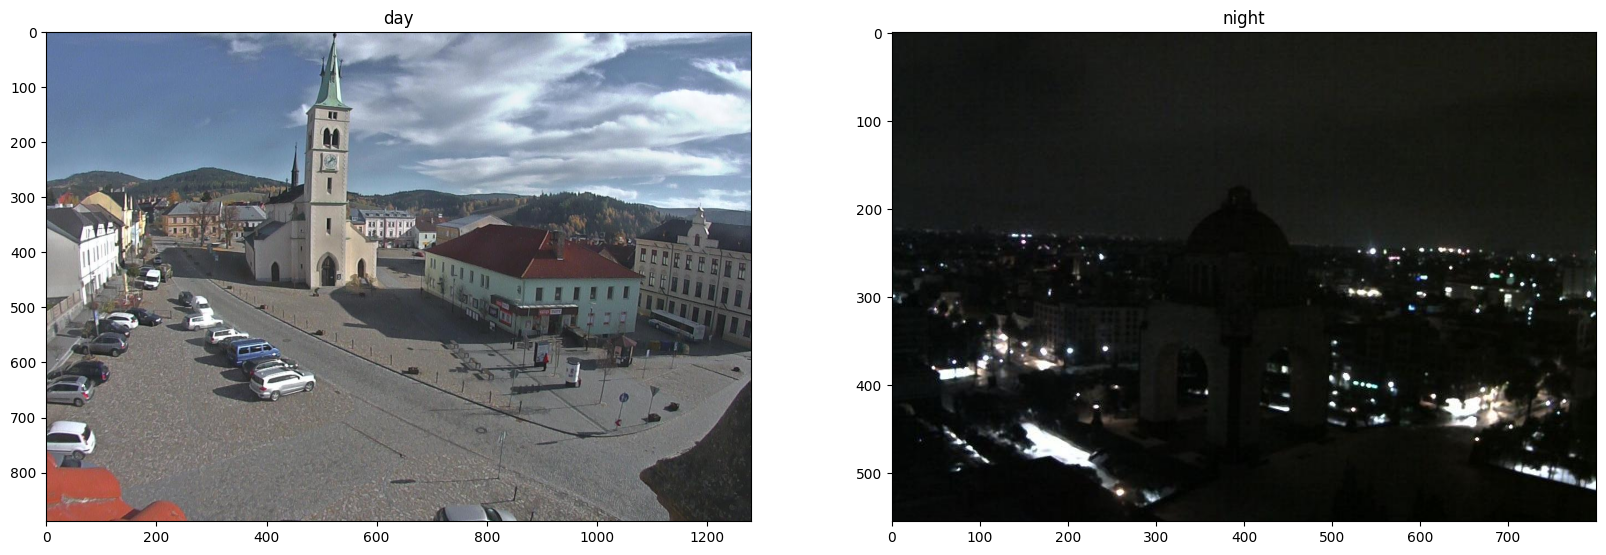

In [40]:
# Select an image and its label by list index
image_index = 22
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Create a subplot of a day image and a night image. The titles should consist of the shape and label
# of the image

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title(selected_label)
ax1.imshow(selected_image, cmap='gray')

image_index = 120
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

ax2.set_title(selected_label)
ax2.imshow(selected_image, cmap='gray')

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [41]:
## Standardize the output using both functions above, standardize the input images and output labels
def standardize(image_list):

    # Empty image data array
    standard_list = []

    # Check for smallest length
    height, width, _ = image_list[0][0].shape
    for image, _ in image_list:
      c_height, c_width , _ = image.shape
      height = min(height, c_height)
      width = min(width, c_width)

    print(f"smallest height: {height}\nsmallest width: {width}")
    # Iterate through all the image-label pairs
    for image, label in image_list:
        # Resize the image to a specific width and height using cv2.resize
        resized_img = cv2.resize(image, (width, height))

        # Create a numerical label based on the string label of the image: day should be 1, night should be 0
        image_label = 1 if label == "day" else 0

        # Append the image, and it's label to the full, processed list of image data
        standard_list.append((resized_img, image_label))



    return standard_list

In [42]:
# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

smallest height: 372
smallest width: 640


## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: ((372, 640, 3))
Label [1 = day, 0 = night]: 1


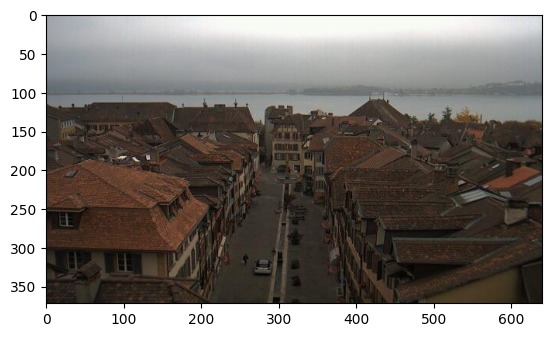

In [43]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print(f"Shape: ({selected_image.shape})")
print(f"Label [1 = day, 0 = night]: {selected_label}")

# Feature Extraction
---

Create a feature that best represents a day or night image. Preprocess the image as you see fit.


In [44]:
num_images = 10
start_idx = 120

# --- Original  Day---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    img, label = STANDARDIZED_LIST[i]
    axes[i].imshow(img)
    axes[i].set_title("Day" if label==1 else "Night")
    axes[i].axis("off")

# --- Hue ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    hsv = cv2.cvtColor(STANDARDIZED_LIST[i][0], cv2.COLOR_RGB2HSV)
    axes[i].imshow(hsv[:, :, 0], cmap="gray")
    axes[i].set_title("Hue")
    axes[i].axis("off")

# --- Saturation ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    hsv = cv2.cvtColor(STANDARDIZED_LIST[i][0], cv2.COLOR_RGB2HSV)
    axes[i].imshow(hsv[:, :, 1], cmap="gray")
    axes[i].set_title("Saturation")
    axes[i].axis("off")

# --- Value ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    hsv = cv2.cvtColor(STANDARDIZED_LIST[i][0], cv2.COLOR_RGB2HSV)
    axes[i].imshow(hsv[:, :, 2], cmap="gray")
    axes[i].set_title("Value")
    axes[i].axis("off")


# --- Original ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    img, label = STANDARDIZED_LIST[start_idx + i]
    axes[i].imshow(img)
    axes[i].set_title("Day" if label==1 else "Night")
    axes[i].axis("off")

# --- Hue ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    hsv = cv2.cvtColor(STANDARDIZED_LIST[start_idx + i][0], cv2.COLOR_RGB2HSV)
    axes[i].imshow(hsv[:, :, 0], cmap="gray")
    axes[i].set_title("Hue")
    axes[i].axis("off")

# --- Saturation ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    hsv = cv2.cvtColor(STANDARDIZED_LIST[start_idx + i][0], cv2.COLOR_RGB2HSV)
    axes[i].imshow(hsv[:, :, 1], cmap="gray")
    axes[i].set_title("Saturation")
    axes[i].axis("off")

# --- Value ---
f, axes = plt.subplots(1, num_images, figsize=(4*num_images, 4))
for i in range(num_images):
    hsv = cv2.cvtColor(STANDARDIZED_LIST[start_idx + i][0], cv2.COLOR_RGB2HSV)
    axes[i].imshow(hsv[:, :, 2], cmap="gray")
    axes[i].set_title("Value")
    axes[i].axis("off")



Output hidden; open in https://colab.research.google.com to view.

In [45]:
def feature_extraction(rgb_image):
    # HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    h, _, v = cv2.split(hsv)

    v_flat = v.ravel().astype(np.uint8)

    # Brightness and contrast
    v_mean   = float(v_flat.mean())
    v_median = float(np.median(v_flat))
    v_p90    = float(np.percentile(v_flat, 90))
    v_std    = float(v_flat.std())

    # Fractions of very bright/dark pixels
    frac_bright = float((v_flat > 200).mean())
    frac_dark   = float((v_flat < 30).mean())




    return np.array([
        v_mean, v_median, v_p90, v_std,
        frac_bright, frac_dark,
    ], dtype=np.float32)

In [46]:
def print_features(vec):
    names = [
        "v_mean", "v_median", "v_p90", "v_std",
        "frac_bright", "frac_dark"
    ]
    for name, val in zip(names, vec):
        print(f"{name:12s}: {val:.2f}")
    print("-" * 30)

# Uso

for image, label in STANDARDIZED_LIST[:10]:
    print("Day" if label == 1 else "Night")
    feats = feature_extraction(image)
    print_features(feats)

for image, label in STANDARDIZED_LIST[120:130]:
    print("Day" if label == 1 else "Night")
    feats = feature_extraction(image)
    print_features(feats)


Day
v_mean      : 98.00
v_median    : 70.00
v_p90       : 197.00
v_std       : 63.98
frac_bright : 0.09
frac_dark   : 0.06
------------------------------
Day
v_mean      : 112.15
v_median    : 116.00
v_p90       : 153.00
v_std       : 45.18
frac_bright : 0.04
frac_dark   : 0.01
------------------------------
Day
v_mean      : 106.69
v_median    : 79.00
v_p90       : 208.00
v_std       : 63.85
frac_bright : 0.13
frac_dark   : 0.05
------------------------------
Day
v_mean      : 135.00
v_median    : 124.00
v_p90       : 241.00
v_std       : 66.34
frac_bright : 0.22
frac_dark   : 0.02
------------------------------
Day
v_mean      : 124.07
v_median    : 99.00
v_p90       : 222.00
v_std       : 68.10
frac_bright : 0.19
frac_dark   : 0.00
------------------------------
Day
v_mean      : 128.37
v_median    : 101.00
v_p90       : 251.00
v_std       : 62.83
frac_bright : 0.17
frac_dark   : 0.00
------------------------------
Day
v_mean      : 200.01
v_median    : 231.00
v_p90       : 238.00
v

# Classification and Visualizing Error

In this section, we'll turn feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### Build a complete classifier

Propose a classifier, and use it to create a model that classifies images into night and day. Include metrics that evaluate the performance of your model.

In [47]:
# TODO: Create a classifier for the night and day images. Include plots to show the metrics of the perfomance of the model.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train = np.vstack([feature_extraction(img) for img, _ in STANDARDIZED_LIST])
y_train = np.array([lbl for _, lbl in STANDARDIZED_LIST])  # 1=day, 0=night

scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_train)

clf = LogisticRegression(max_iter=2000, class_weight='balanced')
clf.fit(X_tr_s, y_train)





LogisticRegression(class_weight='balanced', max_iter=2000)

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook.

### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [48]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

/content
smallest height: 372
smallest width: 640


Test your model on all the images from the test data. Add all the misclassified images to a new list.

In [49]:
# TODO: Test your model and save the misclasified images to a new list.

X_test = np.vstack([feature_extraction(img)
                   for img, _ in STANDARDIZED_TEST_LIST])
y_test = np.array([lbl for _, lbl in STANDARDIZED_TEST_LIST])  # 1=day, 0=night

X_te_s = scaler.transform(X_test)

y_pred = clf.predict(X_te_s)

Accuracy: 0.925
              precision    recall  f1-score   support

    Night(0)       0.90      0.96      0.93        80
      Day(1)       0.96      0.89      0.92        80

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.92       160
weighted avg       0.93      0.93      0.92       160



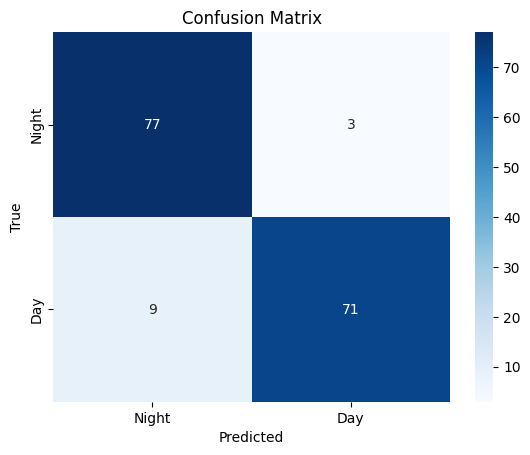

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Night(0)", "Day(1)"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Night","Day"], yticklabels=["Night","Day"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


---
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify.

Total misclassified: 12


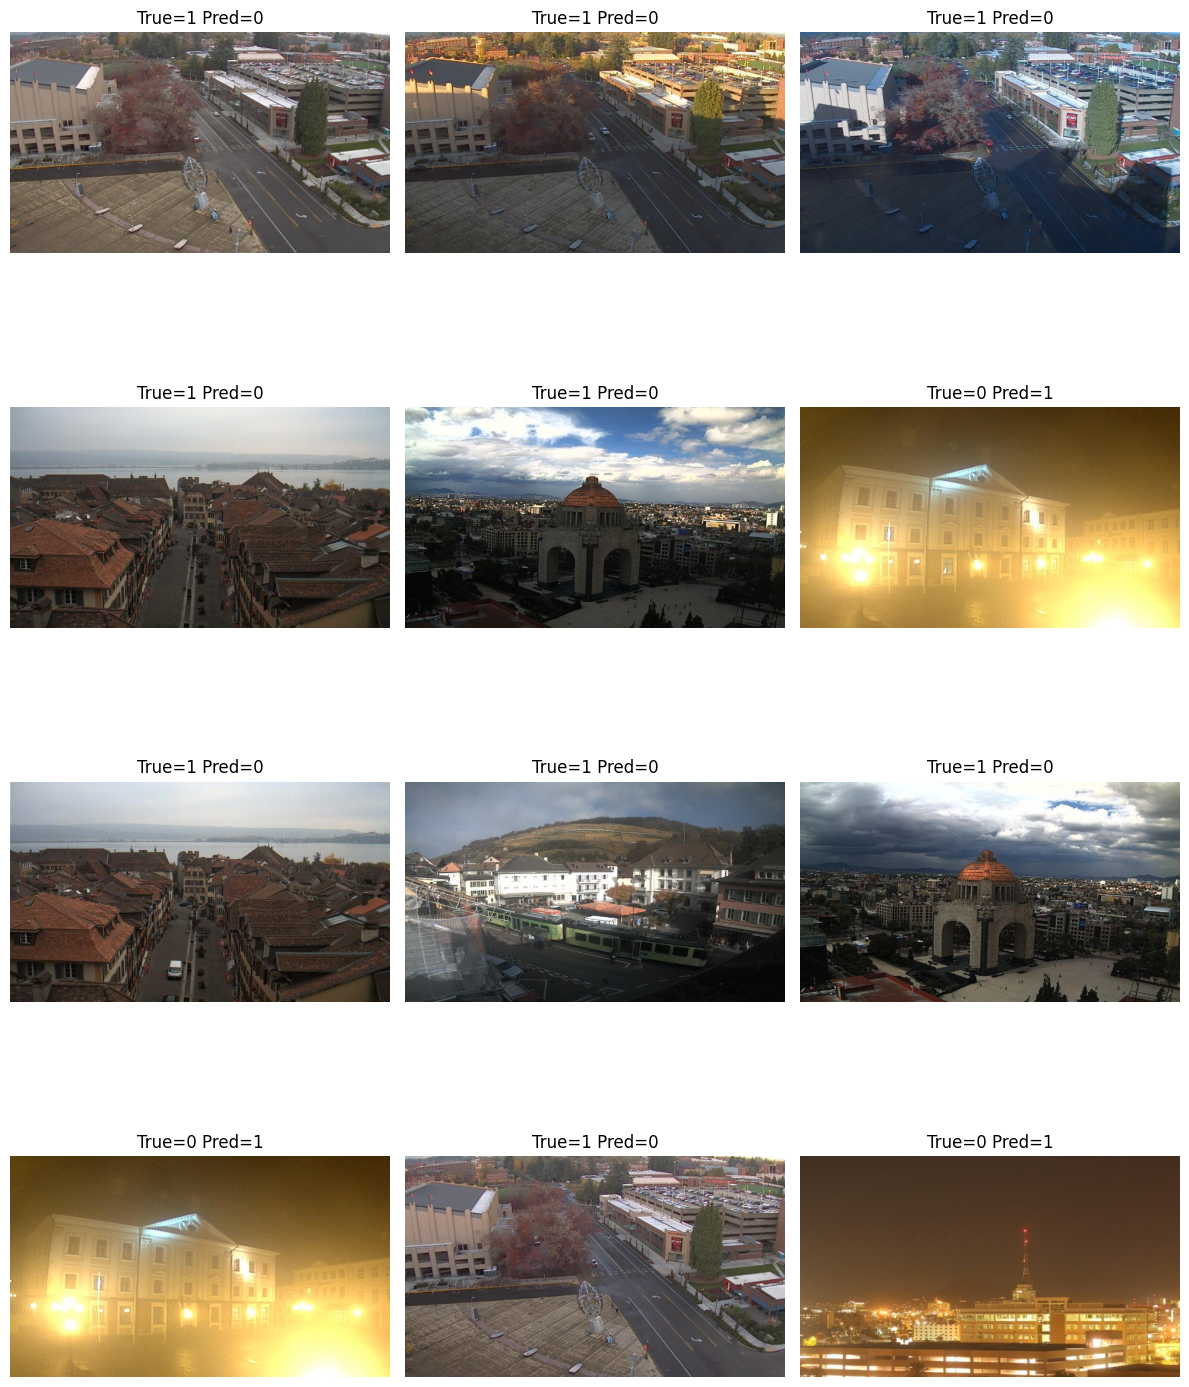

In [51]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified ass
import math

MISCLASSIFIED = []
for (img, _), true, pred in zip(STANDARDIZED_TEST_LIST, y_test, y_pred):
    if true != pred:
        MISCLASSIFIED.append((img, true, pred))

print(f"Total misclassified: {len(MISCLASSIFIED)}")

k = len(MISCLASSIFIED)
cols = 3
rows = math.ceil(k / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

axes = axes.flatten()

for ax, (img, true, pred) in zip(axes, MISCLASSIFIED[:k]):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"True={true} Pred={pred}")

for ax in axes[k:]:
    ax.axis("off")

plt.tight_layout()
plt.show()




---
### Conclution

The misclassified images share certain qualities that make them harder to categorize correctly. For daytime images predicted as night, the main issue was overall low brightness caused by cloud shadows or muted building colors, which reduced the average Value channel statistics. Nighttime images predicted as day were usually strongly illuminated by artificial lights, producing high brightness values that resembled daylight conditions. In some cases, daytime scenes with large shaded areas were also labeled as night: although parts of the image contained direct sunlight, the dominance of dark regions biased the model’s measurements. These examples suggest that strong local variations in illumination and color distribution can affect the global features used by the classifier, leading to confusion between day and night.